This is the first part of the college tuition prediction project.<br>
In this notebook, data below are collected/cleaned, then saves as csv
<br>
<li>Forbes "America's Top Colleges List"</li>
<li>Cost of College List from the Stephen Phillips Memorial Scholarship Fund</li>
<li>College Data from kaggle</li>
<li>GLOBAL 2000 LIST BY THE CENTER FOR WORLD UNIVERSITY RANKINGS (2021-2022 edition) from Center for World University Rankings</li>

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

/Users/mihohunter/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.25.11) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [270]:
# Scraping data from Forbes "America's Top Colleges List"

url = 'https://www.forbes.com/top-colleges/'
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [/Users/mihohunter/.wdm/drivers/chromedriver/mac64/100.0.4896.60/chromedriver] found in cache
<ipython-input-270-9602d761f70c>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [271]:
school_list=[]

for i in [1, 2, 3, 4]:
    schools = driver.find_elements(By.CLASS_NAME, 'table__row ')

    for school in schools:
        rank = school.find_element(By.CLASS_NAME,'rank').text
        name = school.find_element(By.CLASS_NAME,'organizationName').text
        state = school.find_element(By.CLASS_NAME,'state').text
    #     type_ = school.find_element(By.XPATH, './/*[@id="gatsby-focus-wrapper"]/div/div/div[3]/div[2]/div[2]/div[2]/div[1]/div[2]/div[4]').text
    #     type_ = school.find_element(By.CLASS_NAME,'academics.type').text
        grant = school.find_element(By.CLASS_NAME,'grant-aid').text
        debt = school.find_element(By.CLASS_NAME,'debt').text
        salary = school.find_element(By.CLASS_NAME,'medianBaseSalary').text
        school_item = {
            'rank': rank,
            'name': name,
            'state': state,
    #         'type_':type_,
            'grant': grant,
            'debt': debt,
            'salary': salary,
        }

        school_list.append(school_item)

    # link = driver.find_element(By.CLASS_NAME,'next-page')
    # link.click()

    try:
        element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'next-page')))
        element.click()
    except:
        driver.quit()

df = pd.DataFrame(school_list)    


# <div class="academics.type" role="cell" style="box-sizing: border-box; flex: 150 0 auto; min-width: 0px; width: 150px;">Public</div>
# //*[@id="gatsby-focus-wrapper"]/div/div/div[3]/div[2]/div[2]/div[2]/div[1]/div[2]/div[4]


In [272]:
df.head()

,rank,name,state,grant,debt,salary
0,1.,"University of California, Berkeley",CA,"$19,126","$6,000","$138,800"
1,2.,Yale University,CT,"$55,827","$5,056","$141,300"
2,3.,Princeton University,NJ,"$52,188","$3,888","$150,500"
3,4.,Stanford University,CA,"$54,808","$8,205","$147,100"
4,5.,Columbia University,NY,"$55,071","$10,493","$132,100"


In [249]:
df.tail()

,rank,name,state,grant,debt,salary
595,596.,Whitworth University,WA,"$32,340","$7,191","$89,100"
596,597.,Augustana University,SD,"$22,281","$10,241","$91,900"
597,598.,Luther College,IA,"$31,966","$8,943","$83,800"
598,599.,Coe College,IA,"$35,805","$7,843","$88,300"
599,600.,St. Francis College,NY,"$19,359","$5,853","$93,800"


In [256]:
# saving a copy
df_copy = df.copy()

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rank    600 non-null    int64  
 1   name    600 non-null    object 
 2   state   600 non-null    object 
 3   grant   596 non-null    float64
 4   debt    596 non-null    float64
 5   salary  596 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 28.2+ KB


In [233]:
# saving as csv
#df.to_csv(r'US_college.csv', index = False, header=True)

In [290]:
# steps to convert str to int or float, first remove unnecessary characters
df['rank'] = df['rank'].str.replace('.', '')
df['grant'] = df['grant'].str.replace(',|\$', '')
df['debt'] = df['debt'].str.replace(',|\$', '')
df['salary'] = df['salary'].str.replace(',|\$', '')
print(df.dtypes)

rank      object
name      object
state     object
grant     object
debt      object
salary    object
dtype: object


In [292]:
# convert to int/float
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
df.grant = pd.to_numeric(df.grant, errors='coerce')
df.debt = pd.to_numeric(df.debt, errors='coerce')
df.salary = pd.to_numeric(df.salary, errors='coerce')
print(df.dtypes)

rank        int64
name       object
state      object
grant     float64
debt      float64
salary    float64
dtype: object


In [293]:
df.head()

,rank,name,state,grant,debt,salary
0,1,"University of California, Berkeley",CA,19126.0,6000.0,138800.0
1,2,Yale University,CT,55827.0,5056.0,141300.0
2,3,Princeton University,NJ,52188.0,3888.0,150500.0
3,4,Stanford University,CA,54808.0,8205.0,147100.0
4,5,Columbia University,NY,55071.0,10493.0,132100.0


In [349]:
# saving clean set as csv
df.to_csv(r'US_college_final.csv', index = False, header=True)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

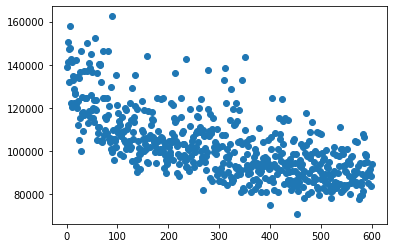

In [294]:
# rank vs salary - just curious if there is pattern!
plt.scatter(df['rank'], df['salary'])
plt.show()

In [3]:
url1 = 'https://phillips-scholarship.org/new-applicants/cost-of-college-list/'
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url1)



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [/Users/mihohunter/.wdm/drivers/chromedriver/mac64/100.0.4896.60/chromedriver] found in cache
<ipython-input-3-631039e6cb0f>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [4]:
school_list1=[]
table_id = driver.find_element(By.XPATH, '//*[@id="tablepress-28"]')

for i in range(1, 55):

    for row in range(1, 11):
        rows = table_id.find_elements(By.XPATH, "//body//tbody//tr[" + str(row) + "]")
        for row_data in rows:
            col = row_data.find_elements(By.TAG_NAME, "td")
            name = col[0].text
            tuition = col[1].text
            oostate = col[2].text
            school_item = {
            'Name': name,
            'Tuition': tuition,
            'Out of State': oostate,
            }
            school_list1.append(school_item)            

    try:
        element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="tablepress-28_next"]')))
        element.click()
    except:
        driver.quit()        
        
        
df_phillips = pd.DataFrame(school_list1)   

In [5]:
df_phillips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          535 non-null    object
 1   Tuition       535 non-null    object
 2   Out of State  535 non-null    object
dtypes: object(3)
memory usage: 12.7+ KB


In [6]:
df_phillips.head()

,Name,Tuition,Out of State
0,Adelphi University,"$44,279",
1,Agnes Scott College,"$46,228",
2,Alabama State University,,"$20,359"
3,Albany College of Pharmacy,"$38,964",
4,Albertus Magnus College,"$36,860",


In [7]:
# saving as csv
df_phillips.to_csv(r'StephenPhillips_tuition.csv', index = False, header=True)

In [42]:
df_p_rev = pd.read_csv('StephenPhillips_tuition_rev 2.csv')

In [43]:
df_p_rev.head()

,Name,Tuition,Out of State,In_State,Is_Private
0,Adelphi University,"$44,279.00",NaN,NaN,1
1,Agnes Scott College,"$46,228.00",NaN,NaN,1
2,Alabama State University,"$20,359.00","$20,359.00",NaN,0
3,Albany College of Pharmacy,"$38,964.00",NaN,NaN,1
4,Albertus Magnus College,"$36,860.00",NaN,NaN,1


In [44]:
df_p_rev['Tuition'] = df_p_rev['Tuition'].str.replace(',|\$', '')
df_p_rev['Out of State'] = df_p_rev['Out of State'].str.replace(',|\$', '')
df_p_rev['In_State'] = df_p_rev['In_State'].str.replace(',|\$', '')

In [45]:
df_p_rev['Tuition'] = pd.to_numeric(df_p_rev['Tuition'], errors='coerce')
df_p_rev['Out of State'] = pd.to_numeric(df_p_rev['Out of State'], errors='coerce')
df_p_rev['In_State'] = pd.to_numeric(df_p_rev['In_State'], errors='coerce')

In [46]:
df_p_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          535 non-null    object 
 1   Tuition       535 non-null    float64
 2   Out of State  145 non-null    float64
 3   In_State      39 non-null     float64
 4   Is_Private    535 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 21.0+ KB


In [21]:
df_college = pd.read_csv('US_college_final.csv')

In [22]:
df_college.head()

,rank,name,state,grant,debt,salary
0,1,"University of California, Berkeley",CA,19126.0,6000.0,138800.0
1,2,Yale University,CT,55827.0,5056.0,141300.0
2,3,Princeton University,NJ,52188.0,3888.0,150500.0
3,4,Stanford University,CA,54808.0,8205.0,147100.0
4,5,Columbia University,NY,55071.0,10493.0,132100.0


In [26]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/Users/mihohunter/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [47]:
# want to merge on "Name" in df_p_rev and "name" in df_college
choices = df_p_rev['Name'].tolist()

def fm(row):
    matches = process.extract(row['name'], choices, limit = 2)
    exactMatchBool = matches[0][1] == 100
    row['Match1'] = matches[0][0]
    row['Match 1 Score'] = matches[0][1]
    row['Match2'] = '' if exactMatchBool else matches [1][0]
    row['Match 2 score'] = '' if exactMatchBool else matches [1][1]
    return row

df_college_matched = df_college.apply(fm, axis = 1)

In [48]:
df_college_matched.head()

,rank,name,state,grant,debt,salary,Match1,Match 1 Score,Match2,Match 2 score
0,1,"University of California, Berkeley",CA,19126.0,6000.0,138800.0,Adelphi University,86,Alfred University,86
1,2,Yale University,CT,55827.0,5056.0,141300.0,Yale University,100,,
2,3,Princeton University,NJ,52188.0,3888.0,150500.0,Princeton University,100,,
3,4,Stanford University,CA,54808.0,8205.0,147100.0,Stanford University,100,,
4,5,Columbia University,NY,55071.0,10493.0,132100.0,Columbia University,100,,


In [29]:
# saving data
df_college_matched.to_csv(r'us_college_matched.csv', index = False, header=True)

In [30]:
# manually corrected unmatched names
df_college_final = pd.read_csv('US_college_matched_rev.csv')

In [49]:
merged = df_p_rev.merge(df_college_final, how='left', left_on = 'Name', right_on = 'name')
merged.columns

Index(['Name', 'Tuition', 'Out of State', 'In_State', 'Is_Private', 'rank',
       'name', 'state', 'grant', 'debt', 'salary', 'Match1', 'Match 1 Score'],
      dtype='object')

In [54]:
# "Cost of College List" merged with Forbe's "America's Top Colleges List"
# Saving as csv

merged.to_csv(r'us_college_merged.csv', index = False, header=True)

In [50]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 534
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           535 non-null    object 
 1   Tuition        535 non-null    float64
 2   Out of State   145 non-null    float64
 3   In_State       39 non-null     float64
 4   Is_Private     535 non-null    int64  
 5   rank           259 non-null    float64
 6   name           259 non-null    object 
 7   state          259 non-null    object 
 8   grant          259 non-null    float64
 9   debt           259 non-null    float64
 10  salary         258 non-null    float64
 11  Match1         259 non-null    object 
 12  Match 1 Score  259 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 58.5+ KB


In [51]:
merged.head()

,Name,Tuition,Out of State,In_State,Is_Private,rank,name,state,grant,debt,salary,Match1,Match 1 Score
0,Adelphi University,44279.0,NaN,NaN,1,249.0,Adelphi University,NY,22447.0,8445.0,94800.0,Adelphi University,100.0
1,Agnes Scott College,46228.0,NaN,NaN,1,427.0,Agnes Scott College,GA,32400.0,8977.0,84900.0,Agnes Scott College,100.0
2,Alabama State University,20359.0,20359.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albany College of Pharmacy,38964.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albertus Magnus College,36860.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


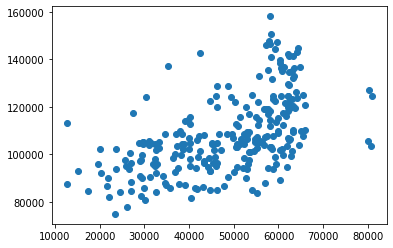

In [52]:
# tuition vs salary 
plt.scatter(merged['Tuition'], merged['salary'])
plt.show()

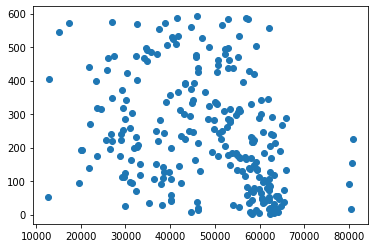

In [53]:
plt.scatter(merged['Tuition'], merged['rank'])
plt.show()

In [310]:
# importing College Data from kaggle
college_data = pd.read_csv('College_Data.csv') #data from kaggle
college_data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [331]:
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    int64  
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [311]:
college_data.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [328]:
# Private : Public/private indicator
# Apps : Number of applications received
# Accept : Number of applicants accepted
# Enroll : Number of new students enrolled
# Top10perc : New students from top 10% of high school class
# Top25perc : New students from top 25% of high school class
# F.Undergrad : Number of full-time undergraduates
# P.Undergrad : Number of part-time undergraduates
# Outstate : Out-of-state tuition
# Room.Board : Room and board costs
# Books : Estimated book costs
# Personal : Estimated personal spending
# PhD : Percent of faculty with Ph.D.’s
# Terminal : Percent of faculty with terminal degree
# S.F.Ratio : Student/faculty ratio
# perc.alumni : Percent of alumni who donate
# Expend : Instructional expenditure per student
# Grad.Rate : Graduation rate

In [312]:
# private = 1, public = 0
college_data['Private'] = college_data['Private'].map(dict(Yes=1, No=0))
college_data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [335]:
college_data.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [357]:
college_data.rename(columns = {'Outstate': 'Tuition', 'perc.alumni':'Perc_alum_donate', 'Grad.Rate':'Grad_Rate'}, inplace=True)

In [364]:
college_data.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Tuition', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'Perc_alum_donate',
       'Expend', 'Grad_Rate'],
      dtype='object')

In [365]:
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        777 non-null    object 
 1   Private           777 non-null    int64  
 2   Apps              777 non-null    int64  
 3   Accept            777 non-null    int64  
 4   Enroll            777 non-null    int64  
 5   Top10perc         777 non-null    int64  
 6   Top25perc         777 non-null    int64  
 7   F.Undergrad       777 non-null    int64  
 8   P.Undergrad       777 non-null    int64  
 9   Tuition           777 non-null    int64  
 10  Room.Board        777 non-null    int64  
 11  Books             777 non-null    int64  
 12  Personal          777 non-null    int64  
 13  PhD               777 non-null    int64  
 14  Terminal          777 non-null    int64  
 15  S.F.Ratio         777 non-null    float64
 16  Perc_alum_donate  777 non-null    int64  
 1

In [380]:
# saving as csv
college_data_rev.to_csv(r'College_data_final.csv', index = False, header=True)

In [114]:
# scraping GLOBAL 2000 LIST BY THE CENTER FOR WORLD UNIVERSITY RANKINGS (2021-2022 edition) from Center for World University Rankings
url1 = 'https://cwur.org/2021-22.php'
driver1 = webdriver.Chrome(ChromeDriverManager().install())
driver1.get(url1)



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [/Users/mihohunter/.wdm/drivers/chromedriver/mac64/100.0.4896.60/chromedriver] found in cache
<ipython-input-114-640ca51de39a>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver1 = webdriver.Chrome(ChromeDriverManager().install())


In [154]:
from bs4 import BeautifulSoup as bs
import pandas as pd

In [160]:
soup = bs(driver1.page_source, 'lxml')
table = soup.select('table')[0]
columns = table.find('thead').find_all('th')
column_names = [c.string for c in columns]

table_rows = table.find('tbody').find_all('tr')
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.string for tr in td]
    l.append(row)

df1 = pd.DataFrame(l,columns = column_names)
df1.head()

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100
1,2,Massachusetts Institute of Technology,USA,2,4,12,2,8,96.7
2,3,Stanford University,USA,3,10,4,3,2,95.1
3,4,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [348]:
# saving as csv
df1.to_csv(r'world_college_data.csv', index = False, header=True)

In [161]:
df1.tail()

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score
1995,1996,Santa Catarina State University,Brazil,56,-,936,-,1938,65.8
1996,1997,Yancheng Institute of Technology,China,275,-,-,-,1920,65.7
1997,1998,Xi'an University of Science and Technology,China,276,-,994,-,1937,65.7
1998,1999,CEU San Pablo University,Spain,53,-,568,-,1992,65.7
1999,2000,Huzhou University,China,277,-,-,-,1922,65.7


In [329]:
df1.dtypes

World Rank                   object
Institution                  object
Country                      object
National Rank                object
Quality of Education Rank    object
Alumni Employment Rank       object
Quality of Faculty Rank      object
Research Performance Rank    object
Score                        object
dtype: object

In [332]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   World Rank                 2000 non-null   object
 1   Institution                2000 non-null   object
 2   Country                    2000 non-null   object
 3   National Rank              2000 non-null   object
 4   Quality of Education Rank  2000 non-null   object
 5   Alumni Employment Rank     2000 non-null   object
 6   Quality of Faculty Rank    2000 non-null   object
 7   Research Performance Rank  2000 non-null   object
 8   Score                      2000 non-null   object
dtypes: object(9)
memory usage: 140.8+ KB


In [350]:
df1['Quality of Education Rank'] = pd.to_numeric(df1['Quality of Education Rank'], errors='coerce')
df1['Alumni Employment Rank'] = pd.to_numeric(df1['Alumni Employment Rank'], errors='coerce')
df1['Quality of Faculty Rank'] = pd.to_numeric(df1['Quality of Faculty Rank'], errors='coerce')
df1['Research Performance Rank'] = pd.to_numeric(df1['Research Performance Rank'], errors='coerce')

In [351]:
# converting "World Rank" to score (max 100)
# formula: (1-(N/2000)) * 100 + 0.05

df1['Quality of Education'] = (1 - (df1['Quality of Education Rank']/2000)) * 100 + 0.05
df1['Alumni Employment'] = (1 - (df1['Alumni Employment Rank']/2000)) * 100 + 0.05
df1['Quality of Faculty'] = (1 - (df1['Quality of Faculty Rank']/2000)) * 100 + 0.05
df1['Research Performance'] = (1 - (df1['Research Performance Rank']/2000)) * 100 + 0.05

In [352]:
df1.head()

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,Quality of Education,Alumni Employment,Quality of Faculty,Research Performance
0,1,Harvard University,USA,1,1.0,1.0,1.0,1.0,100,100.00,100.00,100.00,100.00
1,2,Massachusetts Institute of Technology,USA,2,4.0,12.0,2.0,8.0,96.7,99.85,99.45,99.95,99.65
2,3,Stanford University,USA,3,10.0,4.0,3.0,2.0,95.1,99.55,99.85,99.90,99.95
3,4,University of Cambridge,United Kingdom,1,3.0,25.0,4.0,10.0,94.1,99.90,98.80,99.85,99.55
4,5,University of Oxford,United Kingdom,2,7.0,27.0,9.0,4.0,93.3,99.70,98.70,99.60,99.85


In [353]:
# saving as csv
df1.to_csv(r'world_college_data_final.csv', index = False, header=True)